In [1]:
#all imports for this workbook

import numpy as np
import pandas as pd
import time

import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline 
%config InlineBackend.figure_format='retina'

import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style('white')
from cycler import cycler

# Update matplotlib defaults to something nicer, including the tableau 20 colormap 
mpl_update = {'font.size':16,
              'xtick.labelsize':14,
              'ytick.labelsize':14,
              'figure.figsize':[16,9],
              'axes.labelsize':20,
#               'axes.labelcolor':'#677385',
              'axes.titlesize':20,
              'lines.color':'#0055A7',
              'lines.linewidth':3,
#               'text.color':'#677385',
              'axes.prop_cycle': cycler('color', ['#1f77b4','#aec7e8','#ff7f0e','#ffbb78','#2ca02c',
                                                  '#98df8a','#d62728','#ff9896','#9467bd','#c5b0d5',
                                                  '#8c564b','#c49c94','#e377c2','#f7b6d2','#7f7f7f',
                                                  '#c7c7c7','#bcbd22','#dbdb8d','#17becf','#9edae5'])
             }
mpl.rcParams.update(mpl_update)

In [3]:
#change these paths as necessary
data_path = '/Users/dhawan/Documents/K2/exploratory_analysis/health_project/data/rawLLCP2017.XPT'
hdf_path = '/Users/dhawan/Documents/K2/exploratory_analysis/health_project/data/interim/brfss.h5'

# Data Cleaning and Initial Exploration

In this notebook, we'll seek to answer the initial question in the project:

>What is the state of substance use now (2017)? How does it differ across demographics and geography? Plot substance use across age, gender, education, salary, social determinants, chronic health conditions, and state.

We'll go ahead and load the trimmed and datatype optimized dataset from the last notebook.

In [4]:
# If data not yet loaded
%time df = pd.read_hdf(hdf_path, 'trim_17')

CPU times: user 453 ms, sys: 195 ms, total: 648 ms
Wall time: 959 ms


### Demographic and Geographic Data

Let's explore the splits between key demographic variables in the 2017 dataset, including:

- Education
- Employment
- Income
- State
- Age
- Gender

In [5]:
#rename key variables to something easier to remember
demo_name_map = {'educa': 'education', 'employ1': 'employment', 'income2': 'income', 
                 '_state': 'state', '_age_g': 'age'}
df.rename(demo_name_map, axis=1, inplace=True)

In [6]:
demo_var = ['sex', 'age', 'marital', 'education', 'employment', 'income', 'state']
df_demo = df.loc[:, demo_var]
df_demo.head()

,sex,age,marital,education,employment,income,state
0,2,6,3,6,7,6,1
1,1,6,1,6,7,8,1
2,1,6,1,2,7,99,1
3,2,6,3,3,7,1,1
4,2,6,3,2,8,2,1


Need to create maps between numbers to human readable strings. Unfortunately, this is a very manual process as the CDC doesn't seem to include table maps outside of a pdf file on their website.

In [7]:
# Map demographic attributes to human readable
demo_maps = {

'sex': {
    1: 'male',
    2: 'female',
    9: 'unknown',
    -1: 'unknown'
},
    
'age': {
    1: '18-24',
    2: '25-34',
    3: '35-44',
    4: '45-54',
    5: '55-64',
    6: '>65'
},

'marital': {
    1: 'married',
    2: 'divorced',
    3: 'widowed',
    4: 'separated',
    5: 'never_married',
    6: 'unknown',
    9: 'unknown',
    -1: 'unknown'
},


'education': {
    1: 'no_school',
    2: 'elementary',
    3: 'high_school',
    4: 'high_school',
    5: 'college',
    6: 'college',
    9: 'unknown',
    -1: 'unknown',
},


'employment': {
    1: 'employed',
    2: 'employed',
    3: 'unemployed',
    4: 'unemployed',
    5: 'homemaker',
    6: 'student',
    7: 'retired',
    8: 'unable',
    9: 'unknown',
    -1: 'unknown'
},

'income': {
    1: '<10k',
    2: '<15k',
    3: '<20k',
    4: '<25k',
    5: '<35k',
    6: '<50k',
    7: '<75k',
    8: '>75k',
    77: 'unknown',
    99: 'unknown',
    -1: 'unknown'
}}

Now we can plot distributions of various demographic variables...

In [8]:
#re-map demographic variables

for i,v in enumerate(demo_maps):
    df_demo[v] = df_demo[v].map(demo_maps[v])

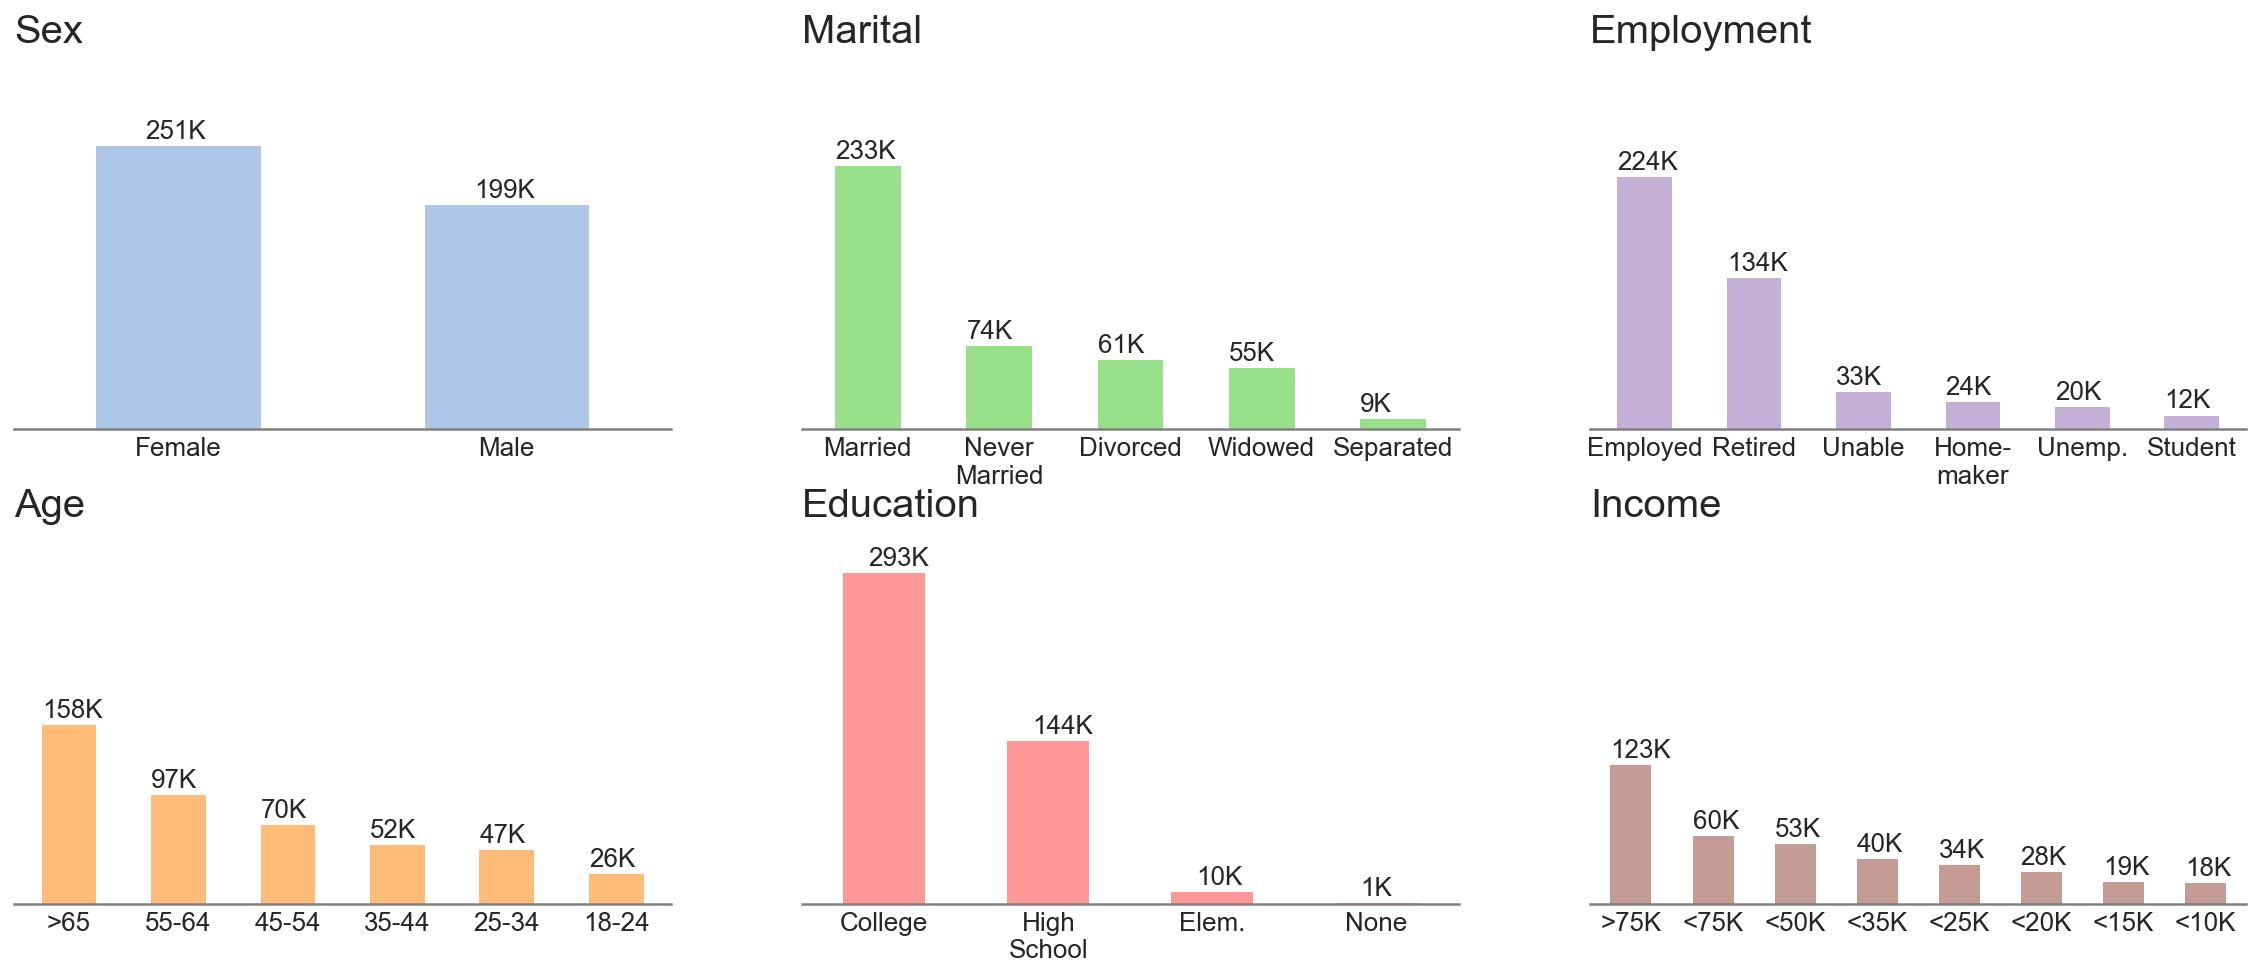

In [29]:
#report ready plot

fig, ax = plt.subplots(2,3,figsize=(20,8))

#tableau colors
colors = ['#aec7e8','#ffbb78','#98df8a','#ff9896','#c5b0d5',
          '#c49c94','#e377c2','#f7b6d2','#7f7f7f',
          '#c7c7c7','#bcbd22','#dbdb8d','#17becf','#9edae5']

#axis-labels
labels= [['Female', 'Male'], ['>65','55-64','45-54','35-44','25-34','18-24'],
        ['Married', 'Never\nMarried', 'Divorced','Widowed','Separated'], ['College', 'High\nSchool', 'Elem.', 'None'],
        ['Employed','Retired','Unable','Home-\nmaker', 'Unemp.', 'Student'], ['>75K', '<75K', '<50K', '<35K', '<25K',
                                                                             '<20K', '<15K', '<10K']]

#create plots
for i, v in enumerate(demo_maps):
    row = i%2
    col = i//2
    values_to_plot = df_demo.loc[df_demo[v]!='unknown', v].value_counts()
    values_to_plot.sort_values(ascending=False).plot(kind='bar', ax=ax[row,col], color=colors[i], rot=0)
    
    ax[row,col].set_ylim(0,350000)
    ax[row,col].set_title(v.capitalize(), loc='left', y=.95, fontdict={'fontsize':20, 
                                                                    'fontweight':0,
                                                                    'fontname': 'Arial'})
    ax[row,col].spines['top'].set_visible(False)
    ax[row,col].spines['bottom'].set_color('grey')
    ax[row,col].spines['right'].set_visible(False)
    ax[row,col].spines['left'].set_visible(False)
    ax[row,col].get_yaxis().set_visible(False)
    
    #axis labels
    ax[row,col].set_xticklabels(labels[i], wrap=True, fontdict={'fontsize': 13})
    
    #annotate each bar
    for p in ax[row,col].patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        if (len(ax[row,col].patches)<=4): x_pad=width*0.3 #adjust label padding in x direction depending on num bars
        else: x_pad = 0
        ax[row,col].annotate('{:.0f}K'.format(height/1000), (p.get_x()+x_pad, p.get_y()+height+ax[row,col].get_ylim()[1]*.02), 
                    fontsize=13)
    
#save plot
fig.savefig('../reports/figures/demographics.png', format='png', dpi=700)

For state distributions, we will also construct a number map and use a single bar plot given the number of values...

In [102]:
#code in this ridiculous number system the CDC decided to use
state_map = {
    1: 'Alabama', 
    2: 'Alaska', 
    4: 'Arizona', 
    5: 'Arkansas', 
    6: 'California', 
    8: 'Colorado',
    9: 'Connecticut', 
    10: 'Delaware', 
    11: 'District of Columbia',
    12: 'Florida', 
    13: 'Georgia', 
    15: 'Hawaii', 
    16: 'Idaho', 
    17: 'Illinois', 
    18: 'Indiana', 
    19: 'Iowa', 
    20: 'Kansas', 
    21: 'Kentucky', 
    22: 'Louisiana', 
    23: 'Maine', 
    24: 'Maryland', 
    25: 'Massachusetts', 
    26: 'Michigan', 
    27: 'Minnesota', 
    28: 'Mississippi', 
    29: 'Missouri', 
    30: 'Montana', 
    31: 'Nebraska', 
    32: 'Nevada', 
    33: 'New Hampshire', 
    34: 'New Jersey', 
    35: 'New Mexico', 
    36: 'New York', 
    37: 'North Carolina', 
    38: 'North Dakota', 
    39: 'Ohio', 
    40: 'Oklahoma', 
    41: 'Oregon', 
    42: 'Pennsylvania', 
    44: 'Rhode Island', 
    45: 'South Carolina', 
    46: 'South Dakota', 
    47: 'Tennessee', 
    48: 'Texas', 
    49: 'Utah', 
    50: 'Vermont', 
    51: 'Virginia', 
    53: 'Washington', 
    54: 'West Virginia', 
    55: 'Wisconsin', 
    56: 'Wyoming',
    66: 'Guam',
    72: 'Puerto Rico' }

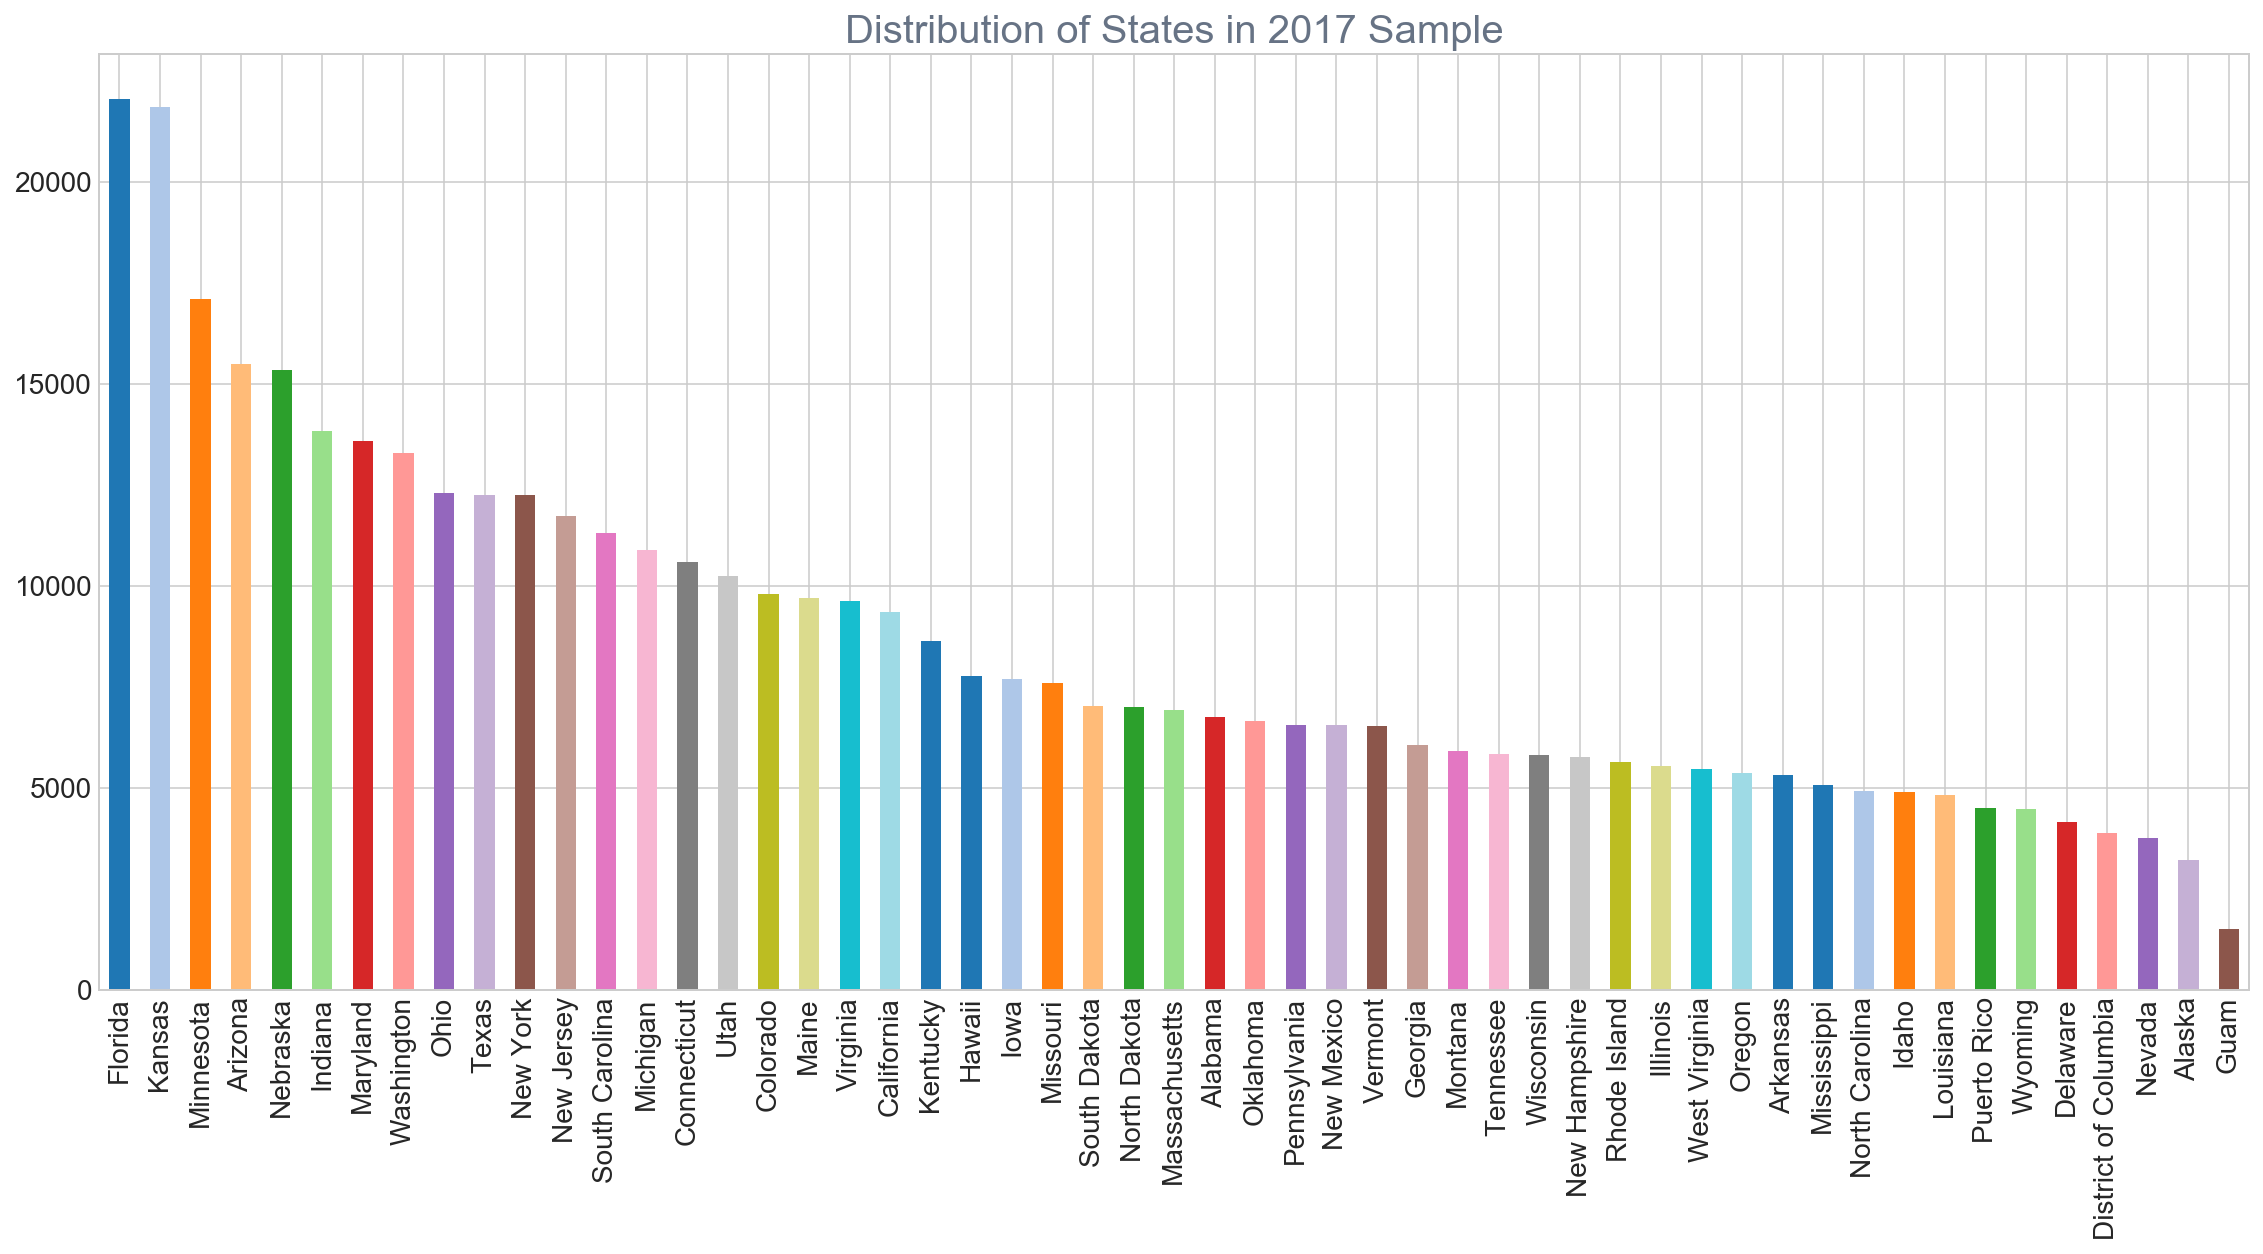

In [103]:
#map states
df_demo['state'] = df_demo.state.map(state_map)

#plot and save the state distribution
ax = df_demo.state.value_counts().sort_values(ascending=False).plot(kind='bar')
ax.set_title('Distribution of States in 2017 Sample')
plt.tight_layout()
plt.savefig('figures/states.png')

Interestingly, the sample is not even at all across states. The distribution across some of the demographic variables also doesn't seem to reflect the U.S. population (e.g., age and sex). Reading the FAQ and documentation for BRFSS, the survey was conducted using a complex survey design with the intent to oversample particular demographic variables and states. To correct for the uneven distribution compared to the national population, the CDC has included a variable "llcpwt", which is a weight to apply to individual responses in order to accurately reflect statistics at a state or national level. [More info here.](https://www.health.ny.gov/diseases/chronic/brfss.htm)

Due to the length of this project, we don't have time to deeply explore the nuances of complex survey design and analysis. Thus, we will present both unweighted and weighted analysis using the llcpwt variable.

### Environmental Variables

Now we want to explore the environmental variables as well, including:

- Social Determinants of Health
    - menthlth - Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good?
    - emtsuprt - How often do you get the social and emotional support you need?
    - lsatisfy - In general, how satisfied are you with your life?
    - sdhbills - During the last 12 months, was there a time when you were not able to pay your mortgage, rent or utility bills?
    - sdhmove - In the last 12 months, how many times have you moved from one home to another?
    - howsafe1 - How safe from crime do you consider your neighborhood to be?
    - sdhmeals - I couldn’t afford to eat balanced meals.” Was that often, sometimes, or never true for you in the last 12 months?
    - sdhmoney - In general, how do your finances usually work out at the end of the month? Do you find that you usually:
    - sdhstres - Question Prologue: Stress means a situation in which a person feels tense, restless, nervous, or anxious, or is unable to sleep at night because his/her mind is troubled all the time. Question: Within the last 30 days, how often have you felt this kind of stress?
- Chronic Health Conditions
    -  addepev2 - (Ever told) you have a depressive disorder (including depression, major depression, dysthymia, or minor depression)?
    

In [41]:
#rename environmental variables to something more transparent
env_name_map = {'emtsuprt': 'emotional_support', 'lsatisfy': 'satisfied_life', 'sdhbills': 'cannot_pay_bills', 
                 'sdhmove': 'times_moved', 'howsafe1': 'safe_living', 'sdhmeals': 'cannot_afford_meals', 'sdhmoney': 'finances',
                  'sdhstres': 'stress', 'addepev2': 'depression', 'menthlth': 'mental_health'}
df.rename(env_name_map, axis=1, inplace=True)

In [42]:
env_var = list(env_name_map.values())
df_env = df.loc[:, env_var]
df_env.head()

,emotional_support,satisfied_life,cannot_pay_bills,times_moved,safe_living,cannot_afford_meals,finances,stress,depression,mental_health
0,-1,-1,-1,-1,-1,-1,-1,-1,2,88
1,-1,-1,-1,-1,-1,-1,-1,-1,2,88
2,-1,-1,-1,-1,-1,-1,-1,-1,2,88
3,-1,-1,-1,-1,-1,-1,-1,-1,1,88
4,-1,-1,-1,-1,-1,-1,-1,-1,2,88


In [43]:
# Map environmental attributes to human readable
env_maps = {

'emotional_support': {
    1: 'always',
    2: 'usually',
    3: 'sometimes',
    4: 'rarely',
    5: 'never',
    7: 'unknown',
    9: 'unknown',
    -1: 'unknown'
},
    
'satisfied_life': {
    1: 'very_satisfied',
    2: 'satisfied',
    3: 'dissatisfied',
    4: 'very_dissatisfied',
    7: 'unknown',
    9: 'unknown',
    -1: 'unknown'
},

'cannot_pay_bills': {
    1: 'yes',
    2: 'no',
    7: 'unknown',
    9: 'unknown',
    -1: 'unknown'
},

'safe_living': {
    1: 'extremely_safe',
    2: 'safe',
    3: 'unsafe',
    4: 'extremely_unsafe',
    7: 'unknown',
    9: 'unknown',
    -1: 'unknown'
},

'cannot_afford_meals': {
    1: 'often_true',
    2: 'sometimes_true',
    3: 'never_true',
    7: 'unknown',
    9: 'unknown',
    -1: 'unknown'
},
    
'finances': {
    1: 'some_money_left',
    2: 'just_enough_money',
    3: 'not_enough_money',
    7: 'unknown',
    9: 'unknown',
    -1: 'unknown'
},  
    
'stress': {
    1: 'none',
    2: 'a_little',
    3: 'some_of_time',
    4: 'most_of_time',
    5: 'all_of_time',
    7: 'unknown',
    9: 'unknown',
    -1: 'unknown'
},  
    
'depression': {
    1: 'yes',
    2: 'no',
    7: 'unknown',
    9: 'unknown',
    -1: 'unknown'
}
}

In [44]:
#re-map environmental variables

for i,v in enumerate(env_maps.keys()):
    df_env[v] = df_env[v].map(env_maps[v])

In [45]:
df_env.head()

,emotional_support,satisfied_life,cannot_pay_bills,times_moved,safe_living,cannot_afford_meals,finances,stress,depression,mental_health
0,unknown,unknown,unknown,-1,unknown,unknown,unknown,unknown,no,88
1,unknown,unknown,unknown,-1,unknown,unknown,unknown,unknown,no,88
2,unknown,unknown,unknown,-1,unknown,unknown,unknown,unknown,no,88
3,unknown,unknown,unknown,-1,unknown,unknown,unknown,unknown,yes,88
4,unknown,unknown,unknown,-1,unknown,unknown,unknown,unknown,no,88


In [36]:
#create categories to make sure bar chart is ordered correctly

df_env['emotional_support'] = pd.Categorical(df['emotional_support'], categories=['unknown', 'never', 'rarely',
                                'sometimes', 'usually', 'always'], ordered=True)
df_env['satisfied_life'] = pd.Categorical(df['satisfied_life'], categories=['unknown', 'very_dissatisfied', 'dissatisfied',
                                'satisfied', 'very_satisfied'], ordered=True)
df_env['safe_living'] = pd.Categorical(df['safe_living'], categories=['unknown', 'extremely_unsafe', 'unsafe',
                                'safe', 'extremely_safe'], ordered=True)
df_env['cannot_afford_meals'] = pd.Categorical(df['cannot_afford_meals'], categories=['unknown', 'never_true', 'sometimes_true',
                                'often_true'], ordered=True)
df_env['finances'] = pd.Categorical(df['finances'], categories=['unknown', 'not_enough_money', 'just_enough_money',
                                'some_money_left'], ordered=True)
df_env['stress'] = pd.Categorical(df['stress'], categories=['unknown', 'none', 'a_little', 'some_of_time',
                                'most_of_time', 'all_of_time'], ordered=True)

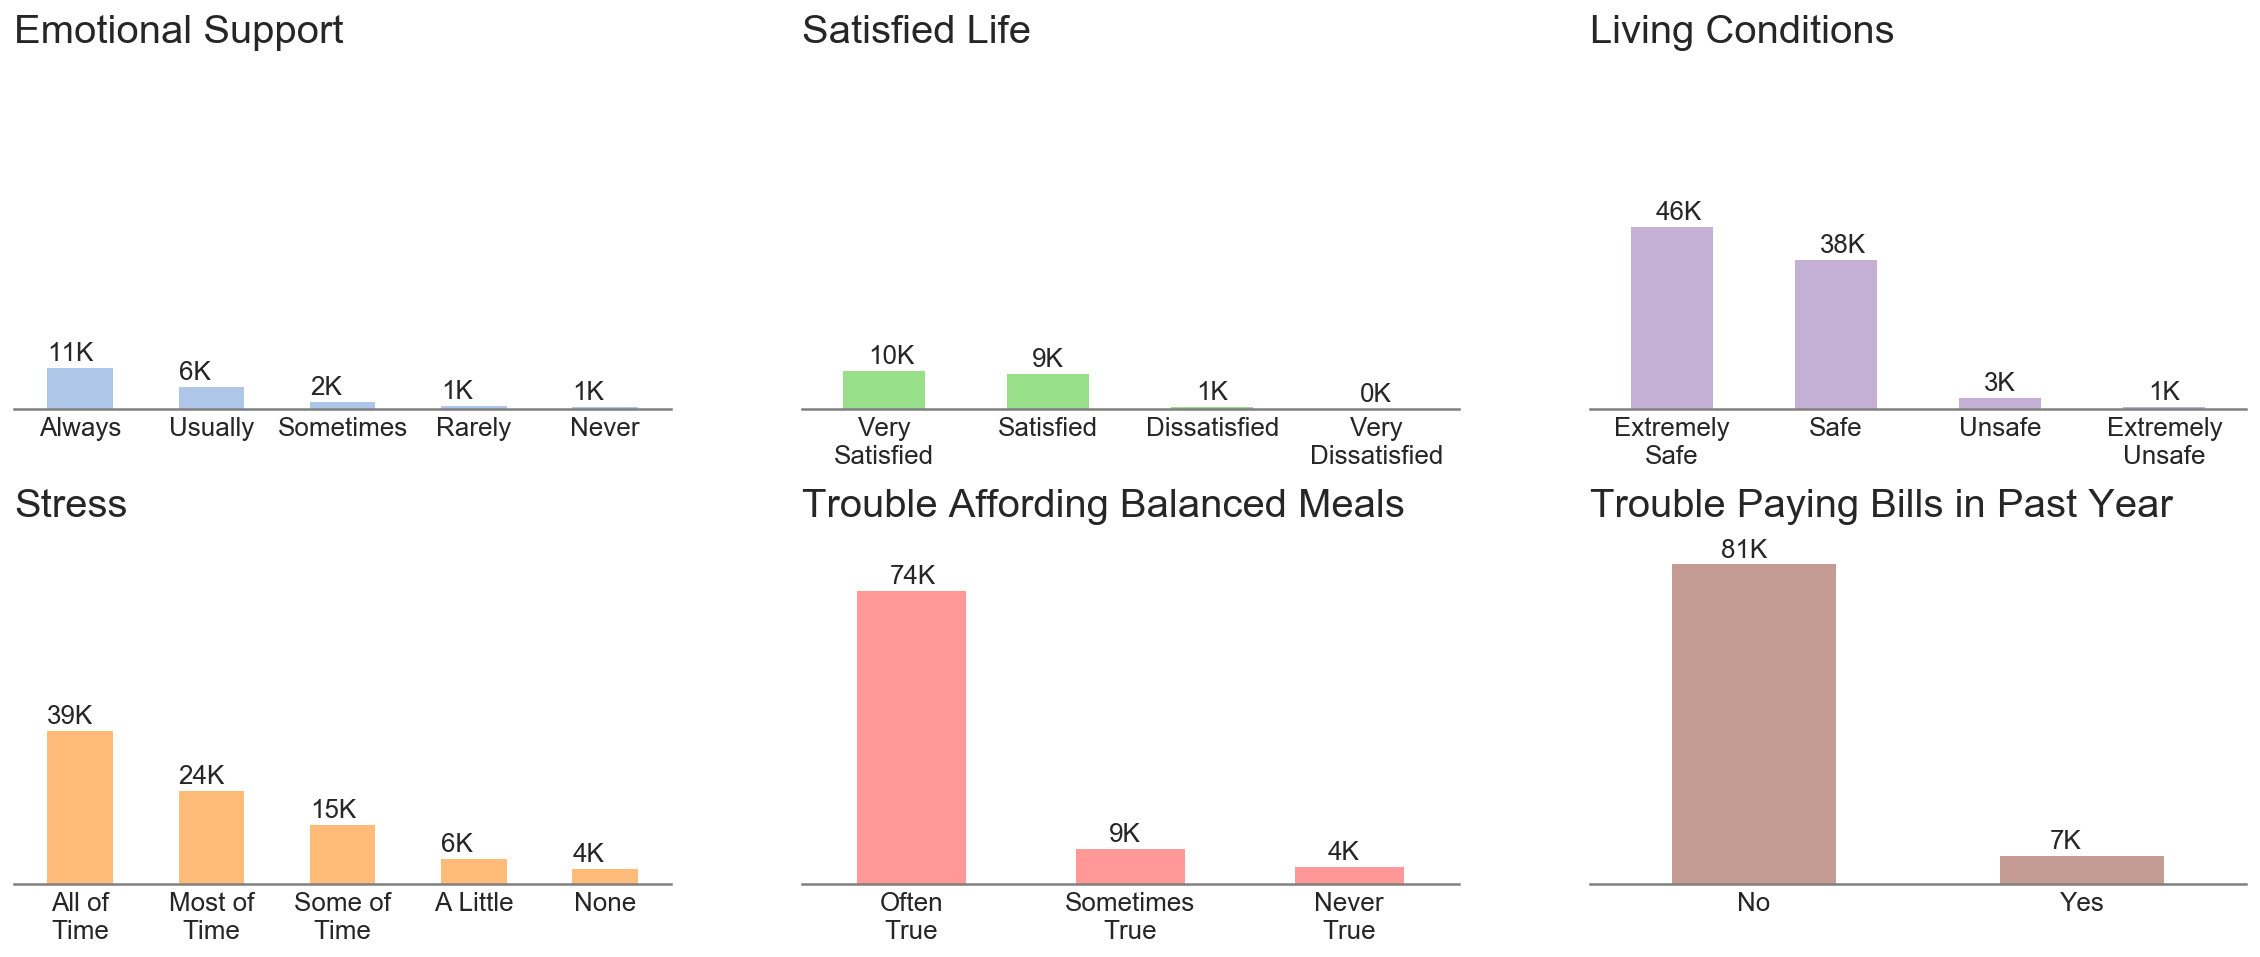

In [51]:
#report ready plot

fig, ax = plt.subplots(2,3,figsize=(20,8))

#tableau colors
colors = ['#aec7e8','#ffbb78','#98df8a','#ff9896','#c5b0d5',
          '#c49c94','#e377c2','#f7b6d2','#7f7f7f',
          '#c7c7c7','#bcbd22','#dbdb8d','#17becf','#9edae5']

#axis-labels
labels= [['Always','Usually', 'Sometimes', 'Rarely', 'Never'], 
         ['All of\nTime', 'Most of\nTime', 'Some of\nTime', 'A Little', 'None'],
         ['Very\nSatisfied', 'Satisfied', 'Dissatisfied', 'Very\nDissatisfied'],
         ['Often\nTrue', 'Sometimes\nTrue', 'Never\nTrue'], 
         ['Extremely\nSafe', 'Safe', 'Unsafe', 'Extremely\nUnsafe'],
         ['No', 'Yes']]

#axis-titles
titles=['Emotional Support', 'Stress', 'Satisfied Life', 
        'Trouble Affording Balanced Meals', 'Living Conditions', 'Trouble Paying Bills in Past Year']

#variables
variables=['emotional_support', 'stress', 'satisfied_life', 'cannot_afford_meals', 'safe_living', 'cannot_pay_bills']

#create plots
for i, v in enumerate(variables):
    row = i%2
    col = i//2
    values_to_plot = df_env.loc[df_env[v]!='unknown', v].value_counts()
    values_to_plot.plot(kind='bar', ax=ax[row,col], color=colors[i], rot=0)
    
    ax[row,col].set_ylim(0,100000)
    ax[row,col].set_title(titles[i], loc='left', y=.9, fontdict={'fontsize':20, 
                                                                    'fontweight':0,
                                                                    'fontname': 'Arial'})
    ax[row,col].spines['top'].set_visible(False)
    ax[row,col].spines['bottom'].set_color('grey')
    ax[row,col].spines['right'].set_visible(False)
    ax[row,col].spines['left'].set_visible(False)
    ax[row,col].get_yaxis().set_visible(False)
    
    #axis labels
    ax[row,col].set_xticklabels(labels[i], wrap=True, fontdict={'fontsize': 13})
    
    #annotate each bar
    for p in ax[row,col].patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        if (len(ax[row,col].patches)<=4): x_pad=width*0.3 #adjust label padding in x direction depending on num bars
        else: x_pad = 0
        ax[row,col].annotate('{:.0f}K'.format(height/1000), (p.get_x()+x_pad, p.get_y()+height+ax[row,col].get_ylim()[1]*.02), 
                    fontsize=13)
    
#save plot
fig.savefig('../reports/figures/environmental.png', format='png', dpi=700)

A couple of the environmental variables are more numerical in nature and have to be binned accordingly. The following code plots the distribution and creates categorical bins. 

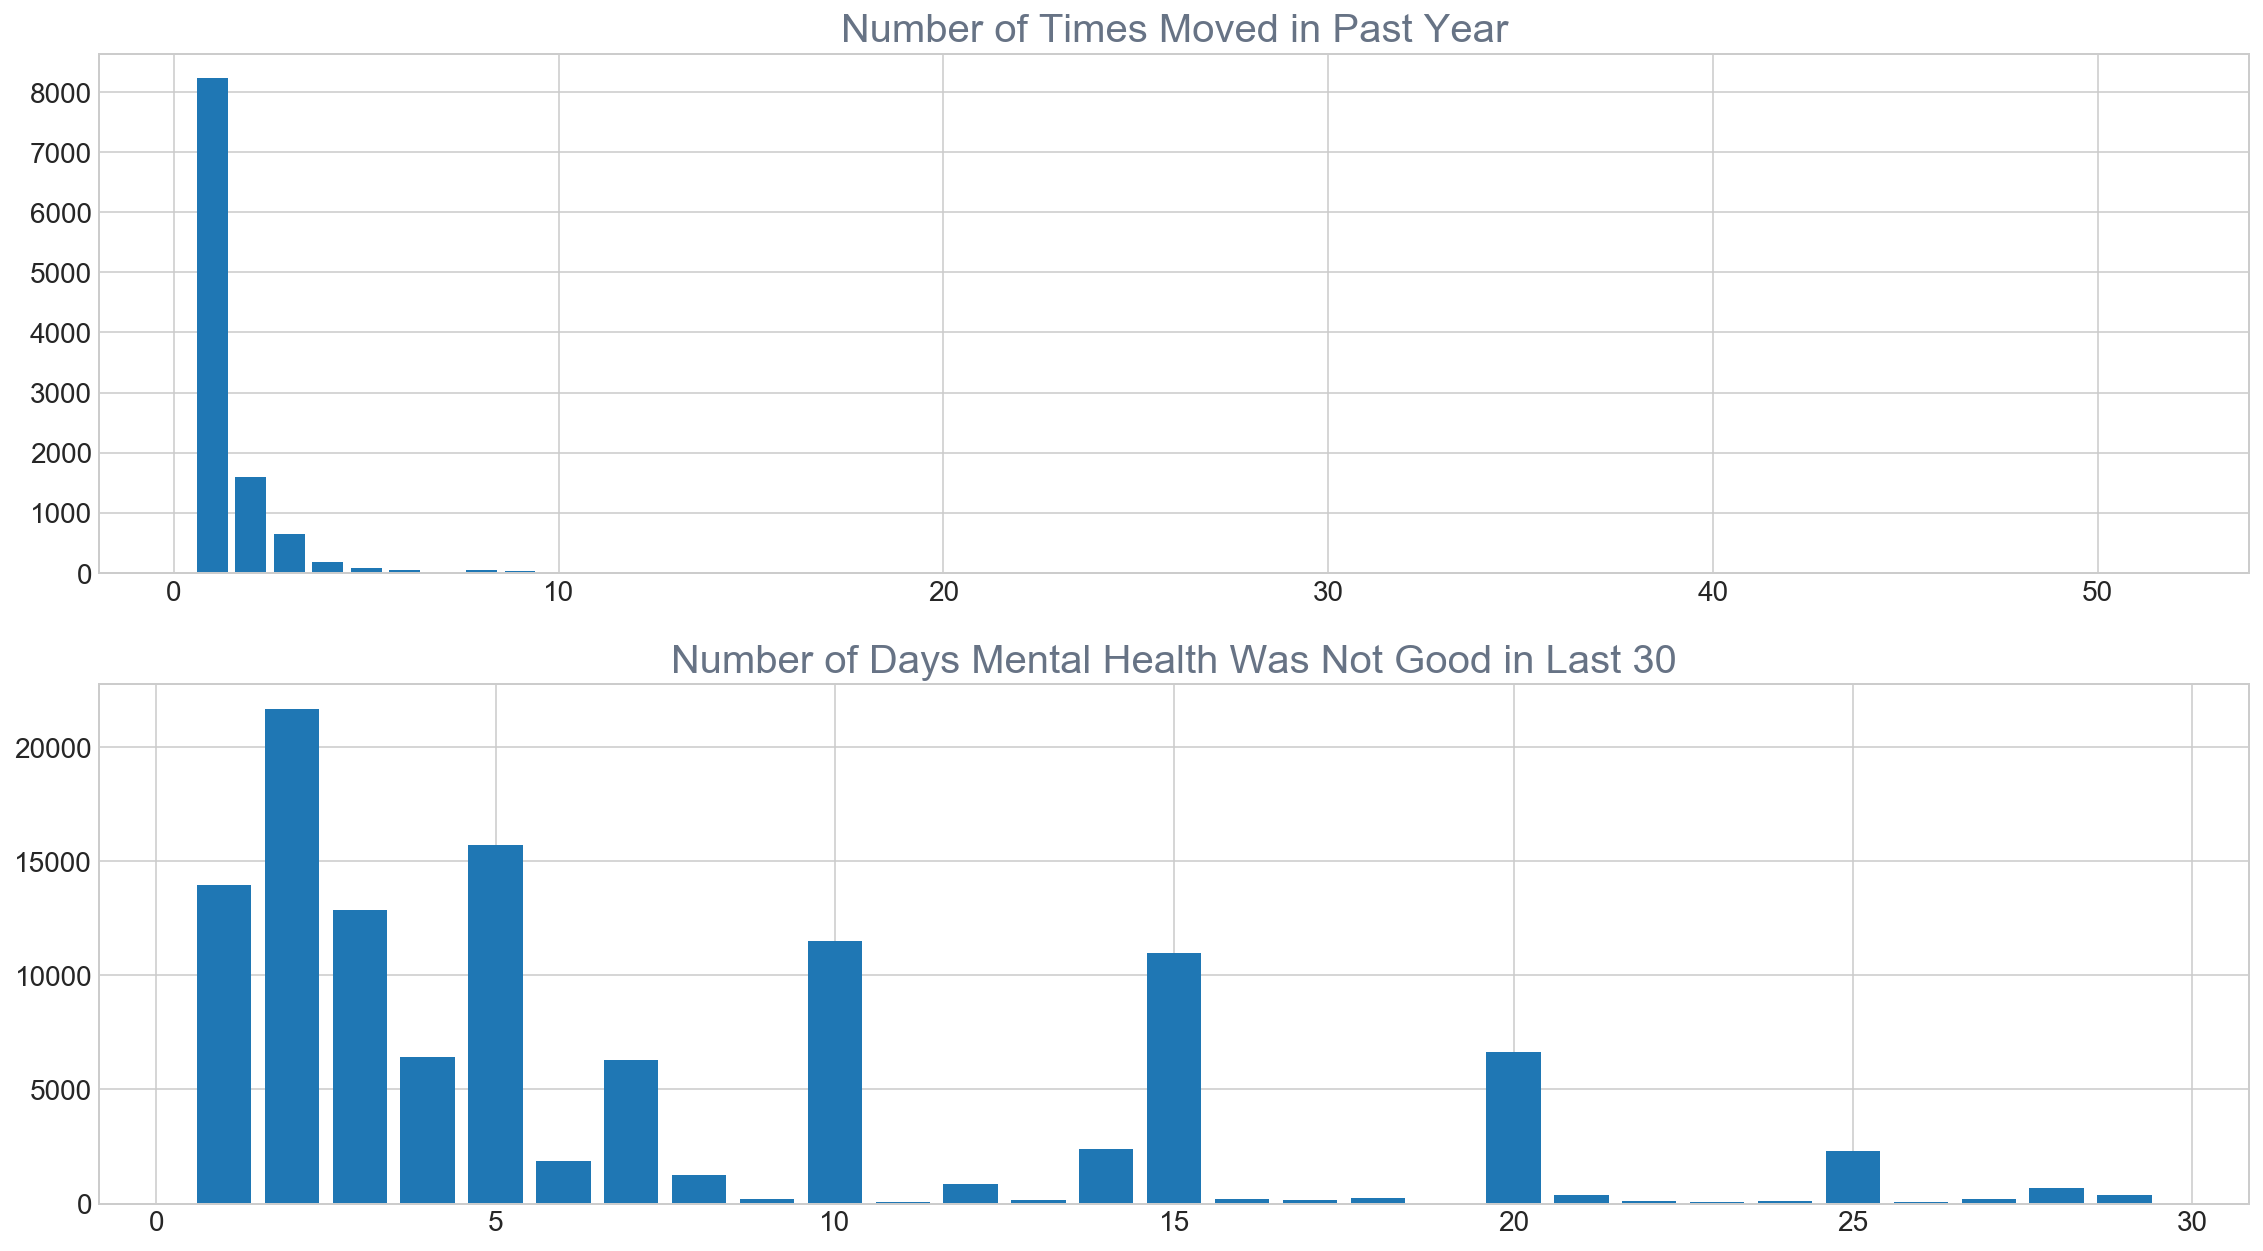

In [110]:
#store numerical environmental variables values in (x,y) format where x is number of drinks and y is number of responses
x_moved = np.arange(1,52)
times_moved = df_env.times_moved.value_counts()
y_moved = [times_moved.loc[i] if i in times_moved.index else 0 for i in x_moved]

x_mh = np.arange(1,30)
mental_health = df_env.mental_health.value_counts()
y_mh = [mental_health.loc[i] if i in mental_health.index else 0 for i in x_mh]

fig,ax = plt.subplots(2,1,figsize=(16,9))

ax[0].bar(x_moved, y_moved)
ax[0].set_title('Number of Times Moved in Past Year')

ax[1].bar(x_mh, y_mh)
ax[1].set_title('Number of Days Mental Health Was Not Good in Last 30')

plt.tight_layout()

In [111]:
#define a function to create bins for these types of numerical variables
def bin_numerical(x, bins):
    """
    Return the binned category for variable in x according to dictionary bins
    
    x should be a single value
    
    bins should be a dictionary with keys either as a single int (e.g., 88) or as
    a tuple representing an inclusive range (e.g., (5,10)). This structure reflects
    the coding of the CDC dataset
    """
    for k, v in bins.items():
        if (isinstance(k,int) and x==k): return v
        elif (isinstance(k,tuple) and x>=k[0] and x<=k[1]): return v
        else: continue
            
    return 'unknown'
        

#define the bins as outlined in the documentation for our bin_numerical function
move_bins = {88: '0', 77: 'unknown', 99: 'unknown', -1: 'unknown', 
             1: '1', 2: '2', (3,df_env.times_moved.max()): '3 or more'}

mh_bins = {88: '0', 77: 'unknown', 99: 'unknown', -1: 'unknown', 
             (1,5): '<5', (6,10): '<10', (11,20): '<20', (21,df_env.mental_health.max()): '>20'}

#create bins for numerical environmental variables
df_env['times_moved_bins'] = df_env.times_moved.apply(lambda x: bin_numerical(x,move_bins))
df_env['poor_mental_health_days'] = df_env.mental_health.apply(lambda x: bin_numerical(x,mh_bins))

In [112]:
#drop the helper variables we used to bin the variables
df_env.drop(['times_moved', 'mental_health'], axis=1, inplace=True)

### Target Variables

Now that we've explored the demographic and environmental variables, let's explore some of the target variables, including:

- Smoking
    - smokday2 (do you now smoke cigarettes)
    - ecignow (do you now use e-cigarettes?)
- Drinking
    - avedrnk2 (how many drinks on average?)
    - drnk3ge5 (how many times did you have 5 or more drinks for men or 4 or more for women?)
    - maxdrnks (what is the largest number of drinks you have had on any occasion during past 30 days?)

In [113]:
#rename key variables to something easier to remember
target_name_map = {'smokday2': 'smoke_now', 'ecignow': 'ecig_now', 'avedrnk2': 'avg_drinks', 
                 'drnk3ge5': 'many_drinks', 'maxdrnks': 'max_drinks', 
                 'marijana': 'marijuana_days', 'rsnmrjna': 'marijuana_purpose'}
df.rename(target_name_map, axis=1, inplace=True)

In [114]:
target_var = ['smoke_now', 'ecig_now', 'avg_drinks', 'many_drinks', 'max_drinks', 
              'alcday5', 'smoke100', 'ecigaret', 'marijuana_days', 'marijuana_purpose']
df_target = df.loc[:, target_var]
df_target.head()

,smoke_now,ecig_now,avg_drinks,many_drinks,max_drinks,alcday5,smoke100,ecigaret,marijuana_days,marijuana_purpose
0,-1,-1,-1,-1,-1,888,2,2,-1,-1
1,-1,-1,-1,-1,-1,888,2,2,-1,-1
2,-1,-1,1,88,1,101,2,2,-1,-1
3,-1,-1,-1,-1,-1,888,2,2,-1,-1
4,3,-1,-1,-1,-1,888,1,2,-1,-1


In [115]:
# Map smoking target attributes to human readable (alcohol are numeric rather than category)
target_maps = {

'smoke_now': {
    0: 'not_at_all',
    1: 'every_day',
    2: 'some_days',
    3: 'not_at_all',
    7: 'unknown',
    9: 'unknown',
    -1: 'unknown'
},
    
'ecig_now': {
    0: 'not_at_all',
    1: 'every_day',
    2: 'some_days',
    3: 'not_at_all',
    7: 'unknown',
    9: 'unknown',
    -1: 'unknown'
},
    
'marijuana_purpose': {
    0: 'do_not_smoke',
    1: 'medical',
    2: 'pleasure',
    3: 'both',
    7: 'unknown',
    9: 'unknown',
    -1: 'unknown'
}}

In [ ]:
#map smoking variables (we have to use smoke100 and ecigaret from codebook to help fill in zeros)
df_target.loc[df_target.smoke100==2, 'smoke_now'] = 0
df_target.loc[df_target.ecigaret==2, 'ecig_now'] = 0
df_target.loc[df_target.marijuana_days==88, 'marijuana_purpose'] = 0
df_target['smoke_now'] = df_target['smoke_now'].map(target_maps['smoke_now'])
df_target['ecig_now'] = df_target['ecig_now'].map(target_maps['ecig_now'])
df_target['marijuana_purpose'] = df_target['marijuana_purpose'].map(target_maps['marijuana_purpose'])

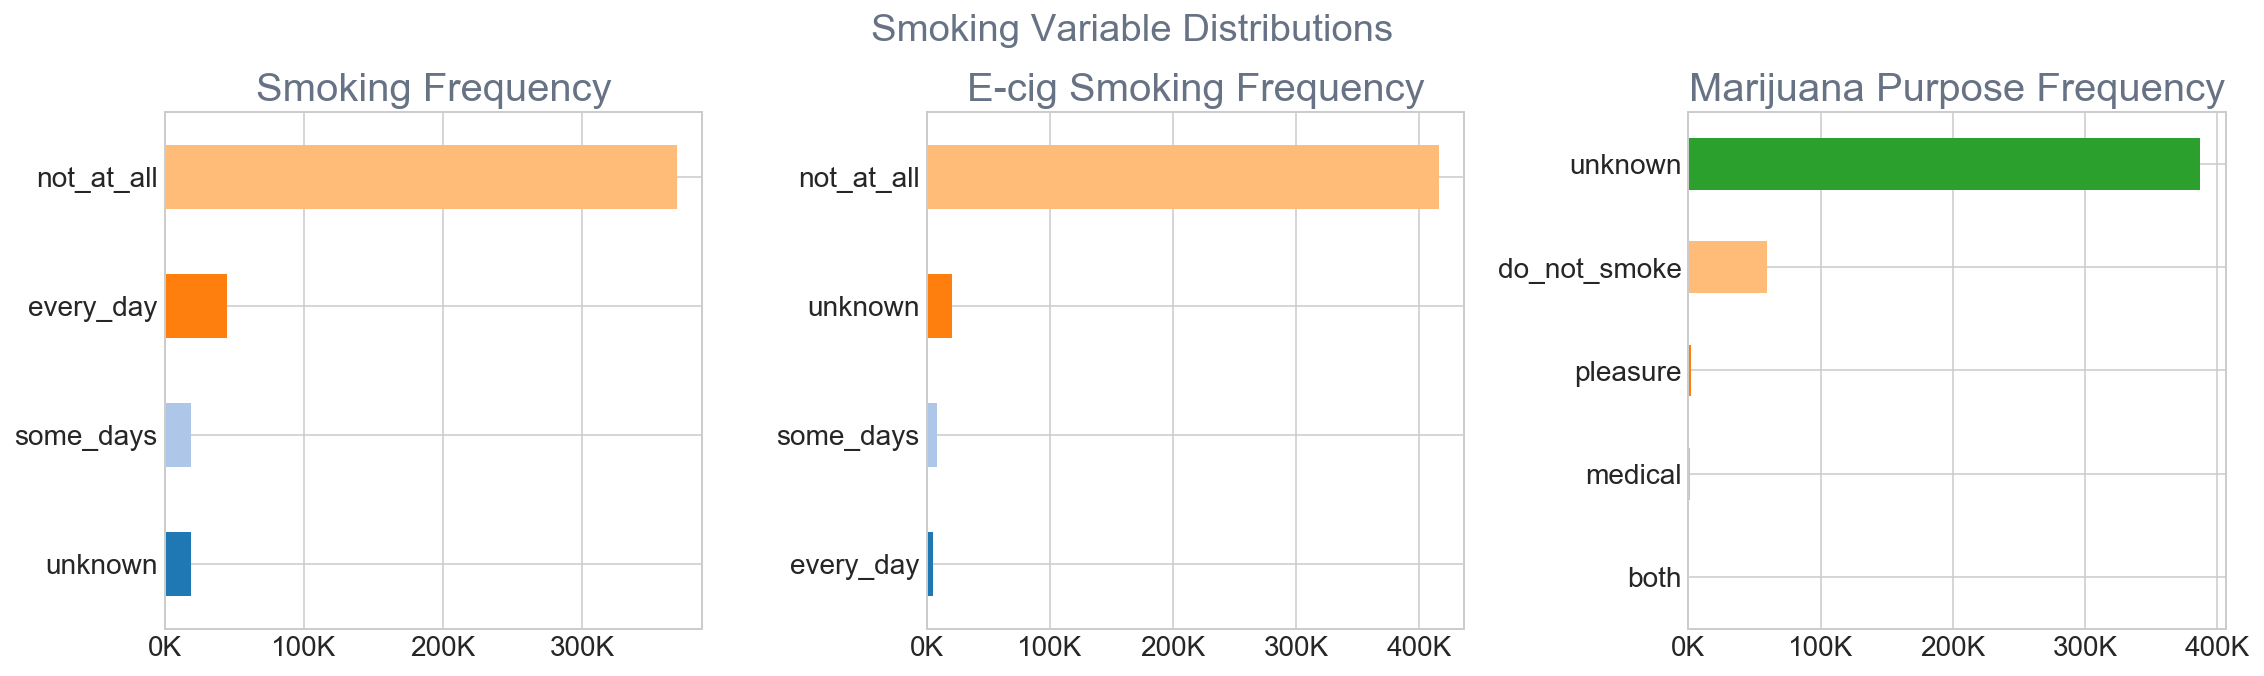

In [116]:
#plot smoking distributions
fig,ax = plt.subplots(1,3,figsize=(16,5))

df_target.smoke_now.value_counts().sort_values().plot(kind='barh', ax=ax[0])
ax[0].set_title('Smoking Frequency')
ax[0].xaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))

df_target.ecig_now.value_counts().sort_values().plot(kind='barh', ax=ax[1])
ax[1].set_title('E-cig Smoking Frequency')
ax[1].xaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))

df_target.marijuana_purpose.value_counts().sort_values().plot(kind='barh', ax=ax[2])
ax[2].set_title('Marijuana Purpose Frequency')
ax[2].xaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))

fig.suptitle('Smoking Variable Distributions', verticalalignment='top')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

#save the figure
fig.savefig('./figures/smoking_dist.png')

Looks reasonable. The marijuana survey was optional, and not asked to as many as the smoking survey. Thus, there are a lot of blank values. Let's look at the numerical variables now.

In [117]:
df_target.marijuana_days.unique()

array([-1, 88,  5, 30, 99,  3,  4, 14, 15,  2,  9,  6, 10,  8,  1, 27, 20,
       29, 16, 25,  7, 77, 28, 12, 24, 17, 23, 26, 18, 21, 11, 13])

In [118]:
#store alcohol variables values in (x,y) format where x is number of drinks and y is number of responses
x = np.arange(1,77)
avg_drinks = df_target.avg_drinks.value_counts()
many_drinks = df_target.many_drinks.value_counts()
max_drinks = df_target.max_drinks.value_counts()
y_avg = [avg_drinks.loc[i] if i in avg_drinks.index else 0 for i in x]
y_many = [many_drinks.loc[i] if i in many_drinks.index else 0 for i in x]
y_max = [max_drinks.loc[i] if i in max_drinks.index else 0 for i in x]

x_mj = np.arange(1,30)
mj_use = df_target.marijuana_days.value_counts()
y_mj = [mj_use.loc[i] if i in mj_use.index else 0 for i in x_mj]

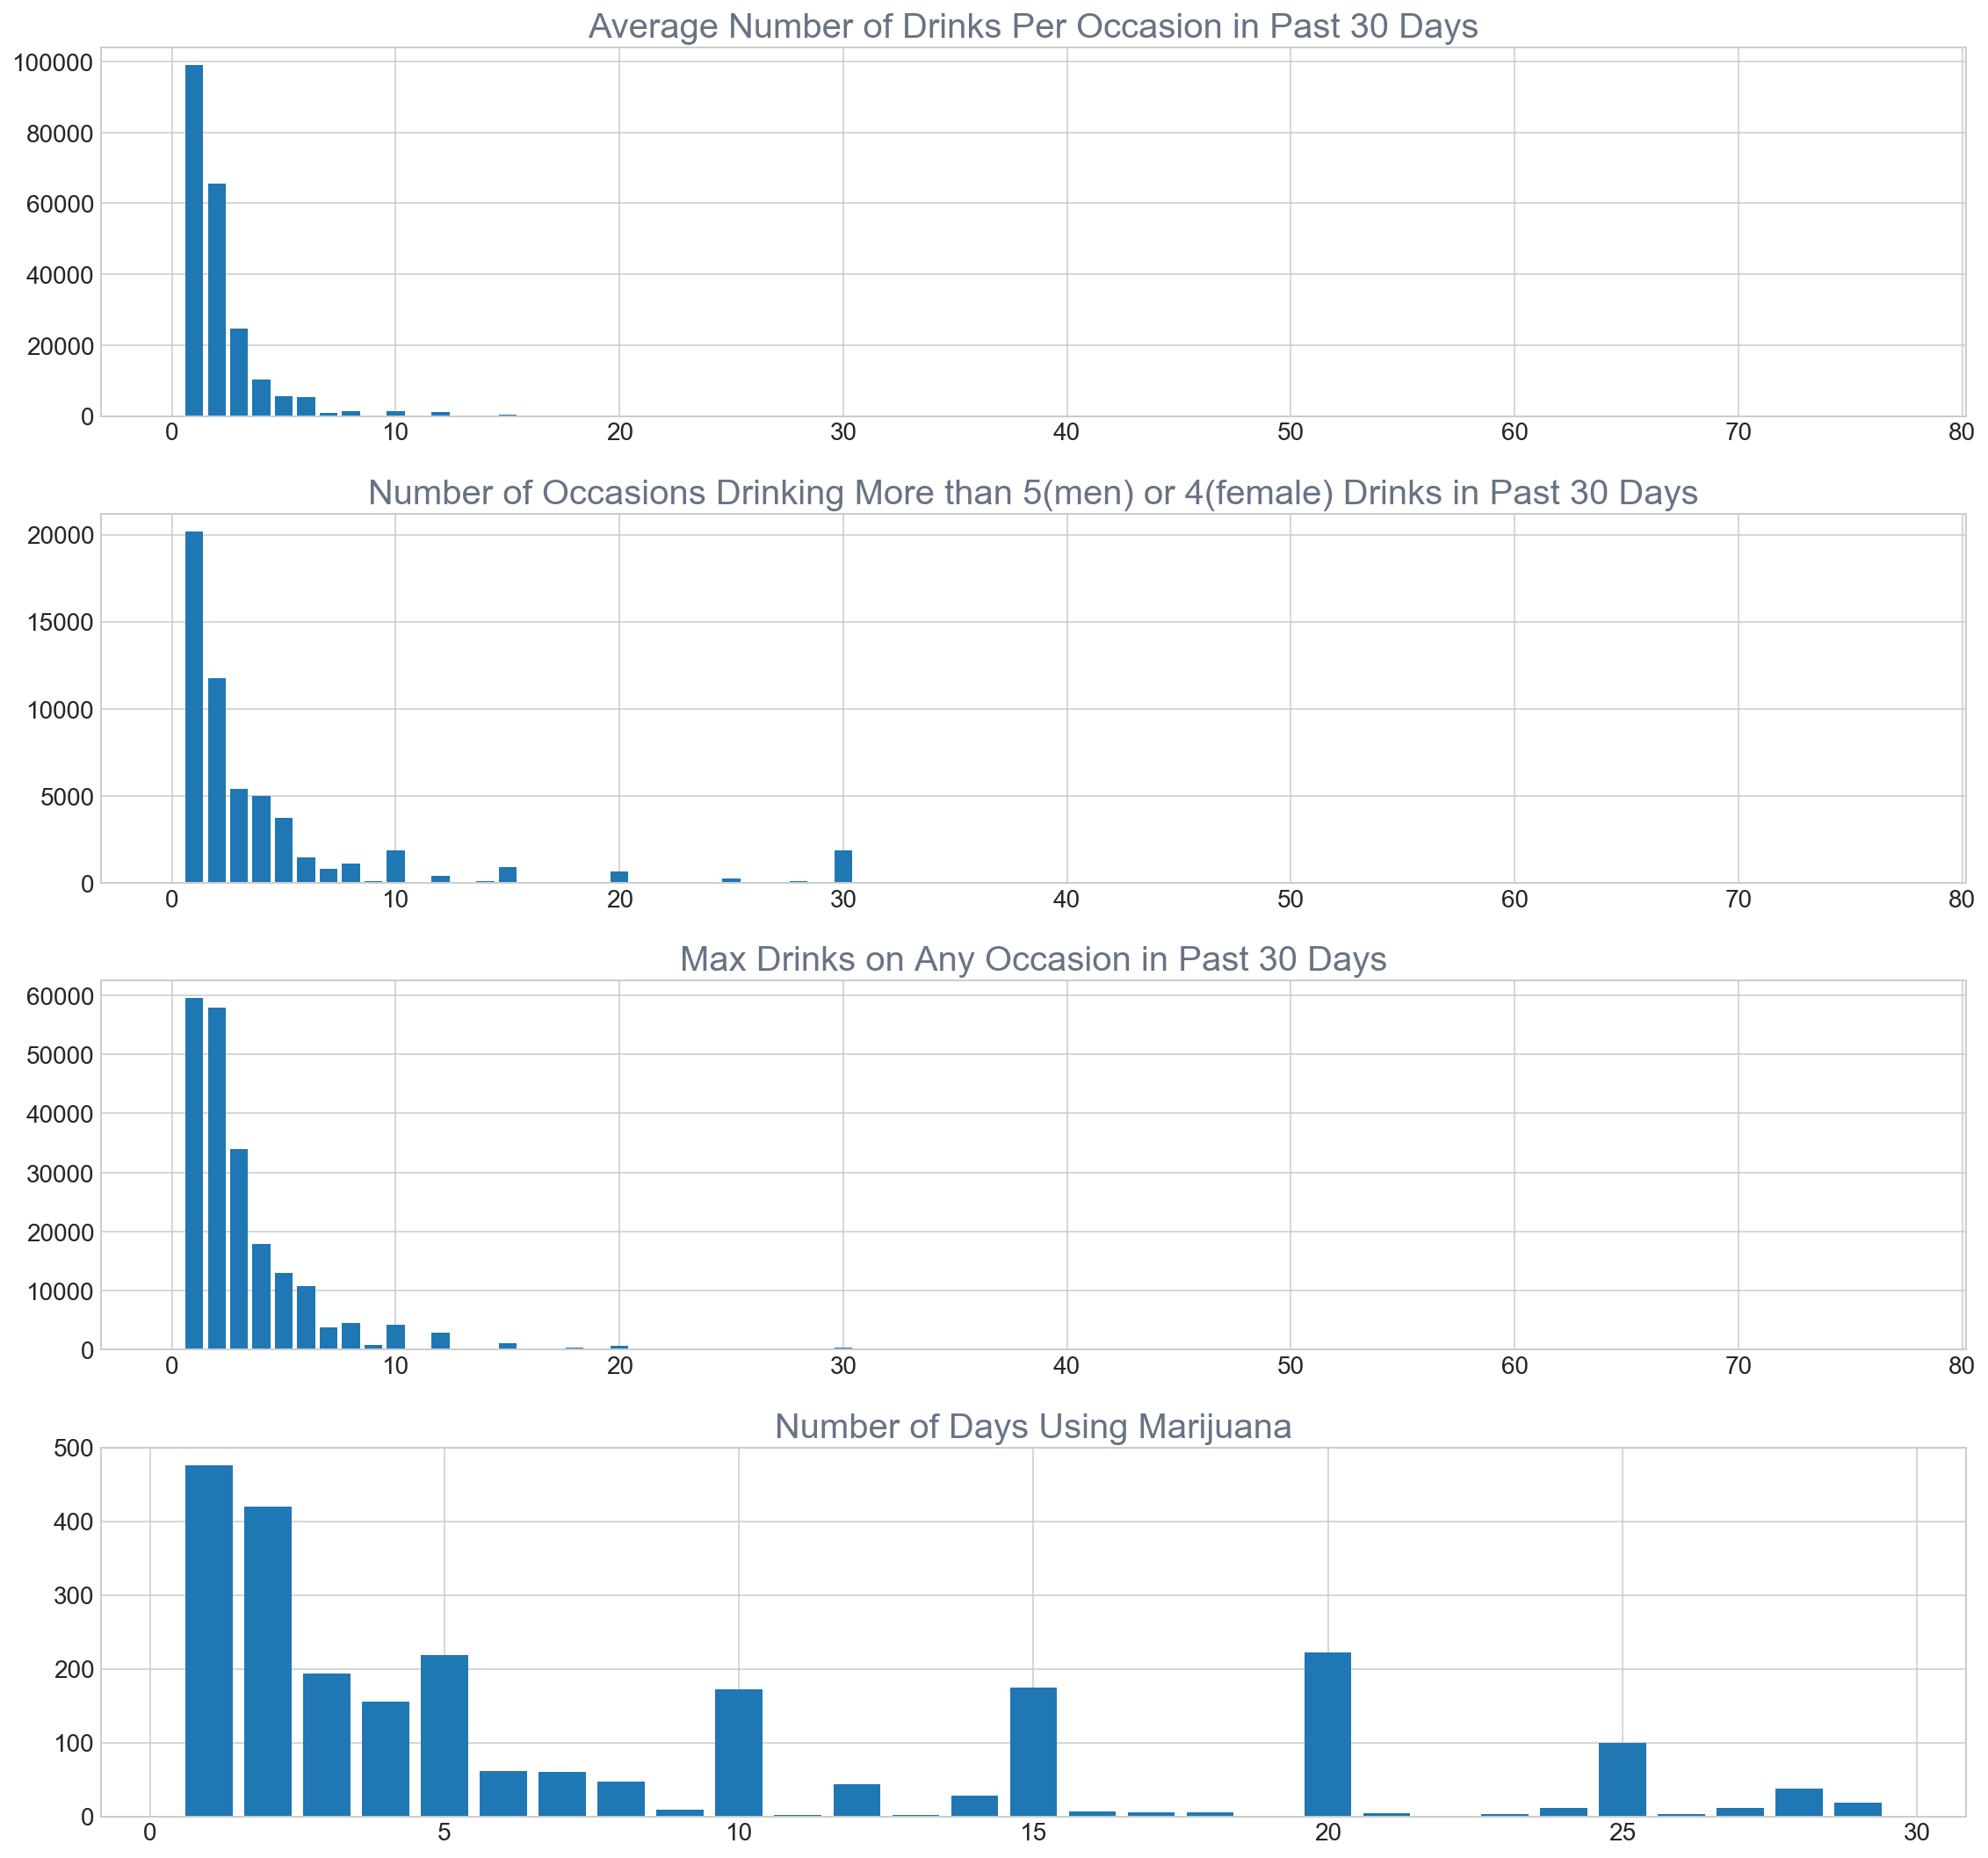

In [119]:
#plot the alcohol target variables for those who have drank in the past 30 days
fig,ax = plt.subplots(4,1,figsize=(16,15))

ax[0].bar(x, y_avg)
ax[0].set_title('Average Number of Drinks Per Occasion in Past 30 Days')
plt.tight_layout()

ax[1].bar(x, y_many)
ax[1].set_title('Number of Occasions Drinking More than 5(men) or 4(female) Drinks in Past 30 Days')
plt.tight_layout()

ax[2].bar(x, y_max)
ax[2].set_title('Max Drinks on Any Occasion in Past 30 Days')

ax[3].bar(x_mj, y_mj)
ax[3].set_title('Number of Days Using Marijuana')

plt.tight_layout()


#save the figure
fig.savefig('./figures/num_target_dist.png')

Clearly, for those who drink, the alcohol variables show an exponential distribution with a majority of respondents indicating 1 - 2 drinks per occasion in the past 30 days. There seem to be a handful of respondents indicating 20 or 30 occasions in the past 30 days where they have drank more than 5 (4 for women) drinks. We should dive into these respondents and see if there are any meaningful differences in their demographic variables.

Unlike the environmental numerical variables, we'll actually leave these in numeric state to facilitate descriptive statistics in the next notebook. But we will have to convert all of the "unknown" codebook values to np.nan to facilitate analysis in the next notebook.

In [120]:
#use alcday5 to code 0 into other variables
df_target.loc[df_target.alcday5==888, ['avg_drinks', 'many_drinks', 'max_drinks']] = 0

#we have to code -1 (unknown) for some of these values to conform with the other variables
df_target.loc[df_target.avg_drinks==77, 'avg_drinks'] = -1
df_target.loc[df_target.avg_drinks==99, 'avg_drinks'] = -1

df_target.loc[df_target.many_drinks==77, 'many_drinks'] = -1
df_target.loc[df_target.many_drinks==88, 'many_drinks'] = 0      #this variable has an 88 in the codebook, corresponding to 0
df_target.loc[df_target.many_drinks==99, 'many_drinks'] = -1

df_target.loc[df_target.max_drinks==77, 'max_drinks'] = -1
df_target.loc[df_target.max_drinks==99, 'max_drinks'] = -1

df_target.loc[df_target.marijuana_days==77, 'marijuana_days'] = -1
df_target.loc[df_target.marijuana_days==88, 'marijuana_days'] = 0      #this variable has an 88 in the codebook, corresponding to 0
df_target.loc[df_target.marijuana_days==99, 'marijuana_days'] = -1

#create a new feature representing the number of days marijuana was used for pleasure
df_target['marijuana_pleasure_days'] = df_target['marijuana_days']
df_target.loc[df_target.marijuana_purpose=='medical','marijuana_pleasure_days'] = 0
df_target.loc[df_target.marijuana_purpose=='both','marijuana_pleasure_days'] = df_target.loc[df_target.marijuana_purpose=='both','marijuana_pleasure_days'] // 2

In [121]:
#drop the helper variables we used to fill in 0s
df_target.drop(['smoke100', 'ecigaret','alcday5', 'marijuana_days'], axis=1, inplace=True)

### Drop all unknowns and bring it all back together

Now we'll combine the variables from the demographic, environmental, and target cleaning exercises. We will then drop rows that have unknowns or nan values across all target variables. This will be our clean and concise dataset to use in the exploration phase.

In [127]:
# bring the demo, env, and target datasets together
df_clean = pd.concat([df_demo, df_env, df_target], axis=1, join='inner')

In [128]:
df_clean_drop_na = df_clean.drop(df_clean[(df_clean.smoke_now=='unknown') & (df_clean.ecig_now=='unknown') \
                        & (df_clean.avg_drinks==-1) & (df_clean.many_drinks==-1) \
                        & (df_clean.max_drinks==-1) & (df_clean.marijuana_purpose=='unknown') \
                        & (df_clean.marijuana_pleasure_days==-1)].index) \
                        .reset_index(drop=True)

In [129]:
# store the clean dataset in an HDF store
df_clean_drop_na.to_hdf(hdf_path, 'clean_17')